# 3. Creating Features

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

accidents = pd.read_csv("./data/accidents.csv")
autos = pd.read_csv("./data/autos.csv")
concrete = pd.read_csv("./data/concrete.csv")
customer = pd.read_csv("./data/customer.csv")

## 설명
### 1) 새로운 features를 찾는 Tips
- 기존 features부터 제대로 이해하라(데이터에 대한 docs가 있으면 그것을 참고하라).
- 문제와 관련된 **도메인 지식**을 학습하라.
- 문제와 관련된 과거 작업을 공부하라. 예를 들어 kaggle competition에서 우승한 코드들을 참고한다.
- 데이터를 시각해보아라.
- Linear models learn sums and differences naturally, but can't learn anything more complex.
- Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.
- Linear models and neural nets generally **do better with normalized features**. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.
- Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.
- **Counts are especially helpful for tree models**, since these models don't have a natural way of aggregating information across many features at once.

### 2) 수학적 변형(Mathematical Transforrms)
- 일반적으로 도메인 놀리지에 기반하여 수행한다.
- columns에 산술 연산을 적용한다.
- columns에 로그를 취한다(데이터 비대칭 보완).

In [5]:
# features 나누기
autos['stroke_ratio'] = autos.stroke / autos.bore
autos[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


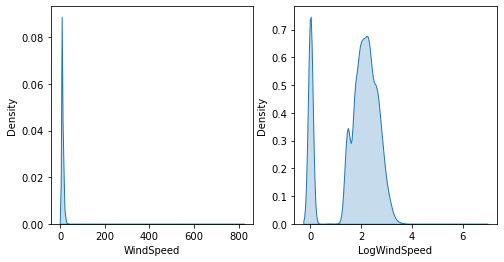

In [12]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
# 'LogWindSpeed' feature의 비대칭이 심하여 log를 취해줌
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

### 3) 개수 세기(Counts)

In [13]:
# binary, boolean features들의 값을 더하여 새로운 칼럼을 만듦
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]

accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [14]:
# 조건을 만족하는 features 값만 더하여 칼럼 만듦
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]

# gt: greater than
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


### 4) 문자열 결합/분리(Building-Up and Breaking-Down Features) 

In [20]:
# features 나누기
customer[["Type", "Level"]] = (  # 두 개의 새로운 features 생성
    customer["Policy"]           # Policy feature로부터
    .str                         # string accessor
    .split(" ", expand=True)     # " " 기준 split
                                 # expand: 두 개의 칼럼으로 분리할 것인가?
)

customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [21]:
# features 합치기
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


### 5) 그룹 변형(Group Transforms)
- 특정 카테고리에 따라 여러 행에 걸친 정보를 종합한다.

In [25]:
# 주(state)에 따른 소득 평균
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [ ]:
# 데이터셋 내 각 주(state)의 빈도
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

In [23]:
# training set과 validation set을 나눌 경우, 각 데이터의 독립성을 보존하기 위해
# training set에서만 grouped feature를 만들고 이를 validation set에 합쳐라

# 데이터셋 분할
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# train set에서만 grouped feature 만들기
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# validation set에 추가
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,377.987867
1,Premium,649.886932
2,Basic,377.987867
3,Basic,377.987867
4,Basic,377.987867
5,Premium,649.886932
6,Basic,377.987867
7,Extended,480.578867
8,Basic,377.987867
9,Premium,649.886932
